<h1>Castillano, Mark Vincent c.</h1>
<h1>BSIT 3A</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import folium
from folium.plugins import HeatMap

In [3]:
Data = pd.read_csv('Datasets(1)\\uk_road_accident.csv')

In [4]:
Data

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
Data['Accident Date'] = Data['Accident Date'].str.strip()

Data['Accident Date'] = Data['Accident Date'].astype('str')

Data['Accident Date'] = Data['Accident Date'].str.replace('/', '-')

Data['Accident Date'] = pd.to_datetime(Data['Accident Date'], dayfirst=True, errors='coerce')

In [6]:
Data['Latitude'] = Data['Latitude'].fillna(Data['Latitude'].mode()[0])
Data['Longitude'] = Data['Longitude'].fillna(Data['Longitude'].mode()[0])
Data['Road_Surface_Conditions'] = Data['Road_Surface_Conditions'].fillna('unaccounted')
Data['Road_Type'] = Data['Road_Type'].fillna('unaccounted')
Data['Urban_or_Rural_Area'] = Data['Urban_or_Rural_Area'].fillna('unaccounted')
Data['Weather_Conditions'] = Data['Weather_Conditions'].fillna(Data['Weather_Conditions'].mode()[0])

In [7]:
Data['Year'] = Data['Accident Date'].dt.year
Data['Month'] = Data['Accident Date'].dt.month
Data['Day'] = Data['Accident Date'].dt.day
Data['DayOfWeek'] = Data['Accident Date'].dt.dayofweek
Data.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

In [8]:
Data.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
Year                                int32
Month                               int32
Day                                 int32
DayOfWeek                           int32
dtype: object

In [9]:
Data['Index'] = Data['Index'].astype('str')
Data['Accident_Severity'] = Data['Accident_Severity'].astype('category')
Data['Light_Conditions'] = Data['Light_Conditions'].astype('category')
Data['District Area'] = Data['District Area'].astype('category')
Data['Road_Surface_Conditions'] = Data['Road_Surface_Conditions'].astype('category')
Data['Road_Type'] = Data['Road_Type'].astype('category')
Data['Urban_or_Rural_Area'] = Data['Urban_or_Rural_Area'].astype('category')
Data['Weather_Conditions'] = Data['Weather_Conditions'].astype('category')
Data['Vehicle_Type'] = Data['Vehicle_Type'].astype('category')
Data['Day'] = Data['Day'].astype('category')

In [10]:
Data.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
Year                                int32
Month                               int32
Day                              category
DayOfWeek                           int32
dtype: object

<h1>Using District Area to make a comparison to a general result </h1>

In [11]:
for a in Data['District Area'].unique():
    print(a)

Kensington and Chelsea
Westminster
Richmond upon Thames
Hammersmith and Fulham
Hounslow
Tower Hamlets
City of London
Southwark
Camden
Hackney
Islington
Barnet
Brent
Haringey
Merton
Ealing
Enfield
Greenwich
Newham
London Airport (Heathrow)
Hillingdon
Waltham Forest
Redbridge
Barking and Dagenham
Bromley
Havering
Croydon
Lambeth
Wandsworth
Sutton
Bexley
Lewisham
Harrow
Kingston upon Thames
Barrow-in-Furness
South Lakeland
Carlisle
Eden
Allerdale
Copeland
Fylde
Blackpool
Wyre
Lancaster
Chorley
West Lancashire
South Ribble
Preston
Blackburn with Darwen
Hyndburn
Ribble Valley
Burnley
Pendle
Rossendale
Wirral
Liverpool
Sefton
Knowsley
St. Helens
Manchester
Salford
Tameside
Stockport
Bolton
Wigan
Trafford
Bury
Rochdale
Oldham
Chester
Vale Royal
Halton
Warrington
Crewe and ntwich
Ellesmere Port and Neston
Congleton
Macclesfield
Crewe and Nantwich
Blyth Valley
Sunderland
Gateshead
North Tyneside
Tynedale
Berwick-upon-Tweed
Newcastle upon Tyne
Castle Morpeth
South Tyneside
Wansbeck
Alnwick
Wear 

<h1>Blackpool Analysis</h1>
<hr>
<h3>District 1</h3>

In [13]:
Blackpool_df = Data[Data['District Area'] == 'Blackpool']

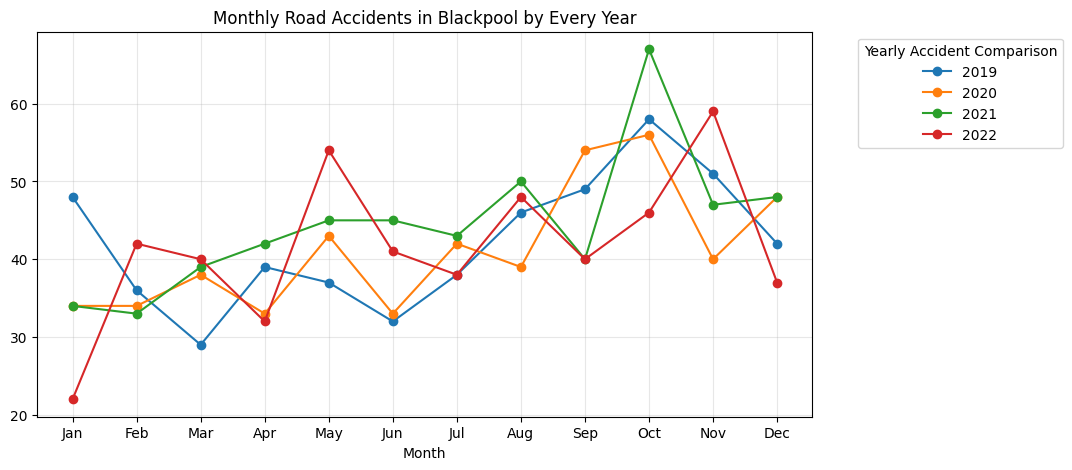

In [14]:
monthly_BPdata = Blackpool_df.groupby(['Year', 'Month']).size()

monthly_BPdata = monthly_BPdata.unstack(level=0)

monthly_BPdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Blackpool by Every Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

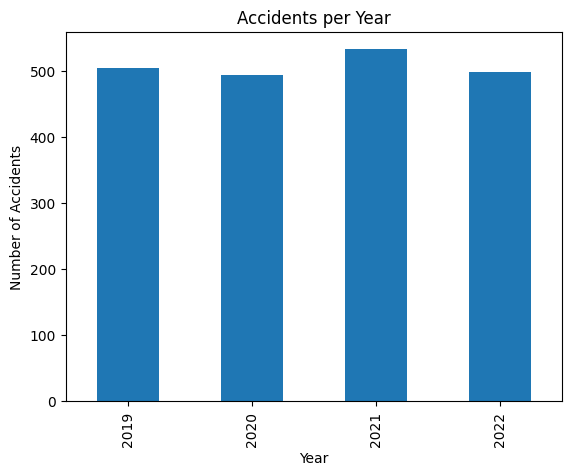

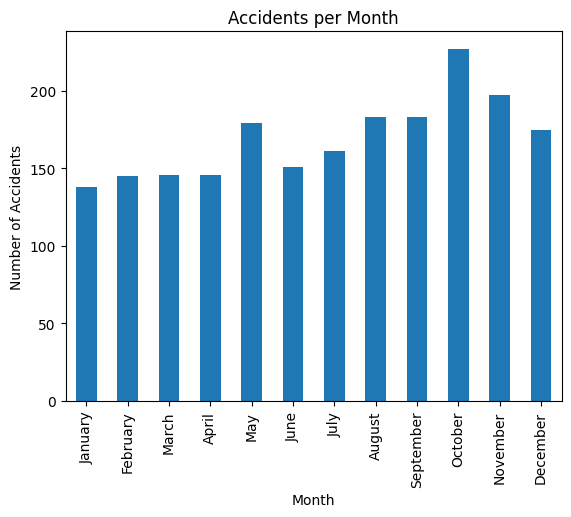

DayOfWeek
Monday       218
Tuesday      306
Wednesday    304
Thursday     286
Friday       273
Saturday     345
Sunday       299
Name: count, dtype: int64


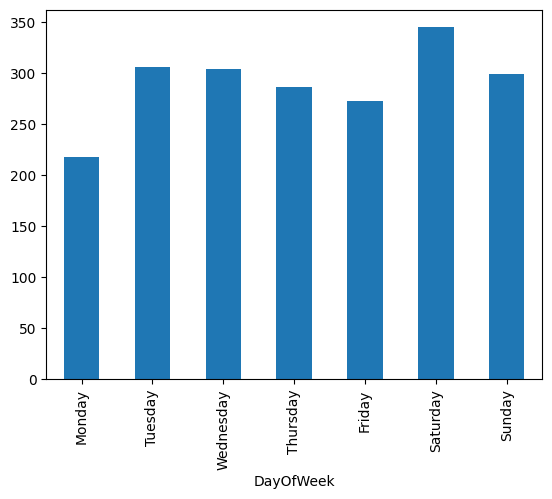

In [15]:
# Accidents per year
accidents_per_year = Blackpool_df['Year'].value_counts().sort_index()
accidents_per_month = Blackpool_df['Month'].value_counts().sort_index()
accidents_per_day = Blackpool_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

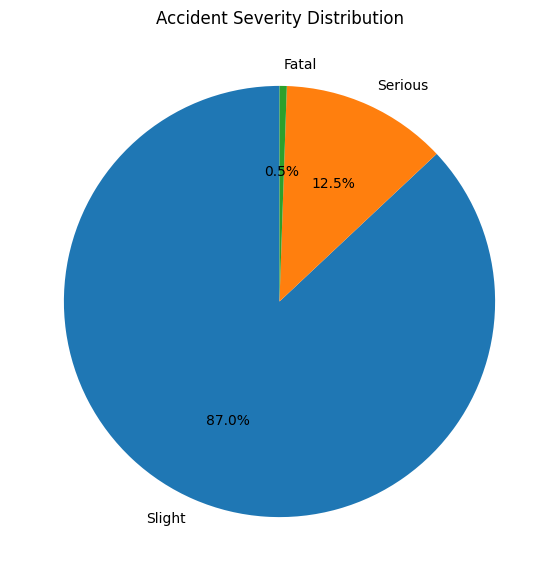

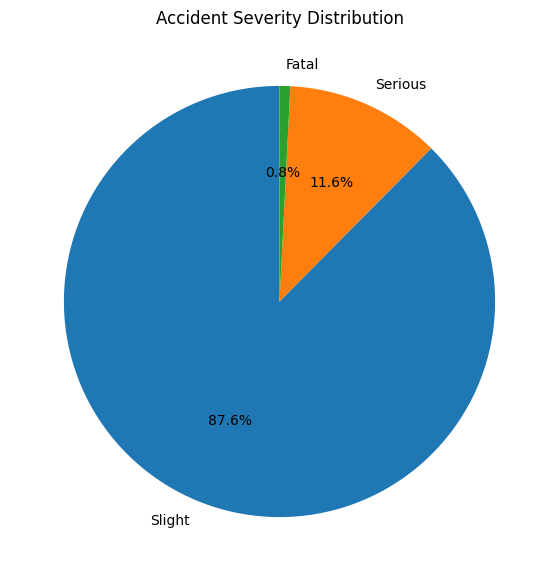

In [30]:
severity_BP  = Blackpool_df['Accident_Severity'].value_counts()

plt.pie(severity_BP,
        labels = severity_BP.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_BP = Blackpool_df[Blackpool_df['Year'] == 2022]

lsc_2022 = severity_2022_BP['Accident_Severity'].value_counts()

plt.pie(lsc_2022,
        labels = lsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

In [17]:
Blackpool_fatal = Blackpool_df[Blackpool_df['Accident_Severity'] == 'Fatal']

In [21]:
location = list(zip(Blackpool_fatal['Latitude'],Blackpool_df['Longitude']))

Map = folium.Map(location=[Blackpool_df['Latitude'].mean(), Blackpool_df['Longitude'].mean()], zoom_start=10)

HeatMap(location).add_to(Map)

# m.save('accident_heatmap.html')  

Map

<h1>INSIGHTS</h1>
<hr>
<h3>1. The year that has the highest count is 2021 in the Blackpool district.</h3>
<h3>2. The month with the highest number of accidents is October.</h3>
<h3>3. Day of the week with the most accidents happend is Saturday.</h3>

<h1>Bolton Analysis</h1>
<hr>
<h3>District 2</h3>

In [22]:
Bolton_df = Data[Data['District Area'] == 'Bolton']

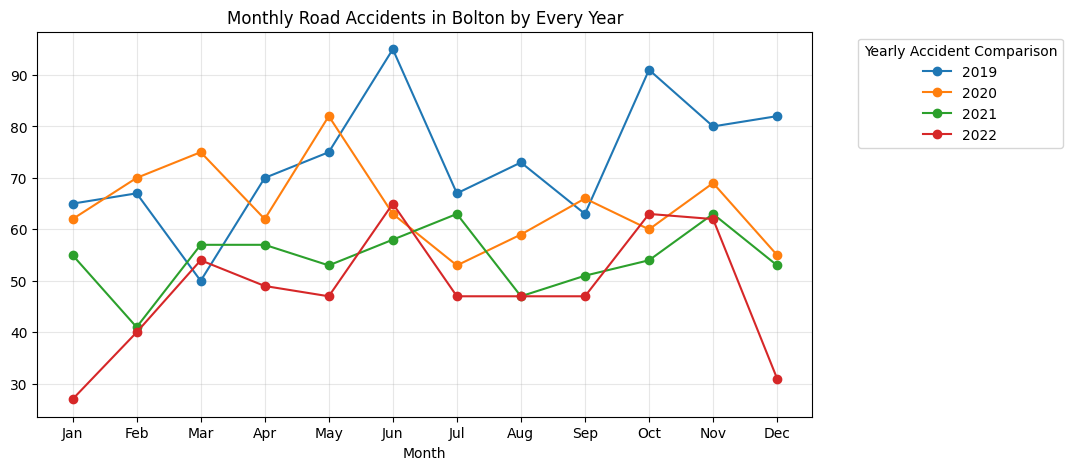

In [32]:
monthly_boltondata = Bolton_df.groupby(['Year', 'Month']).size()

monthly_boltondata = monthly_boltondata.unstack(level=0)

monthly_boltondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Bolton by Every Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

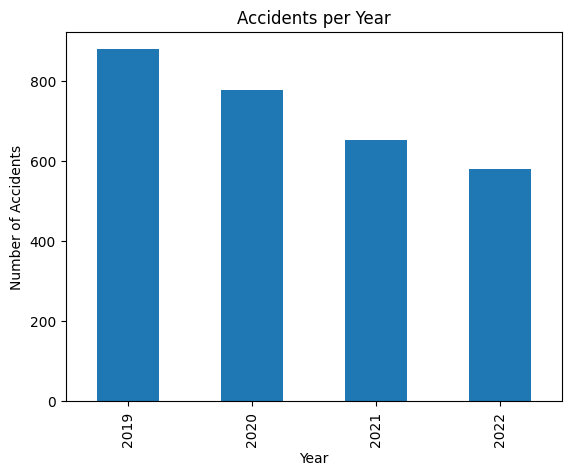

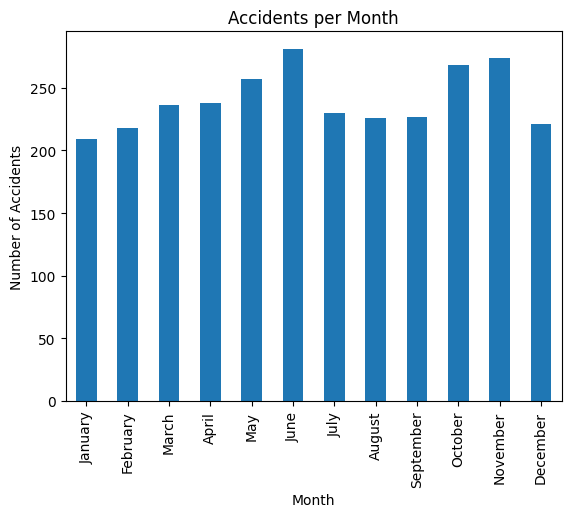

DayOfWeek
Monday       323
Tuesday      428
Wednesday    426
Thursday     419
Friday       445
Saturday     481
Sunday       363
Name: count, dtype: int64


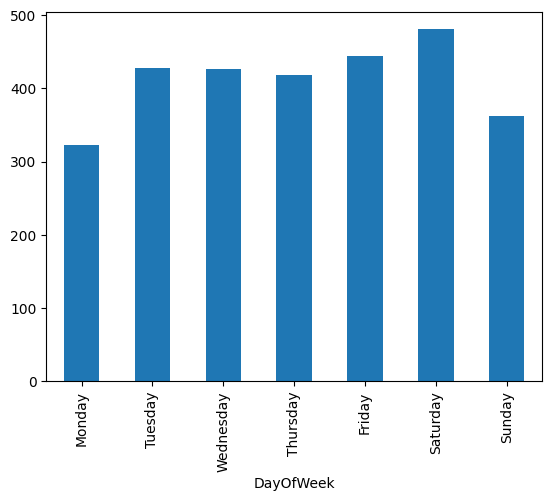

In [24]:
# Accidents per year
accidents_per_year = Bolton_df['Year'].value_counts().sort_index()
accidents_per_month = Bolton_df['Month'].value_counts().sort_index()
accidents_per_day = Bolton_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

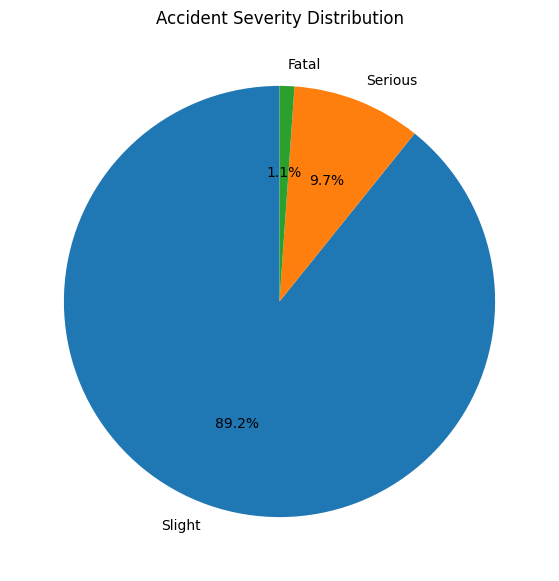

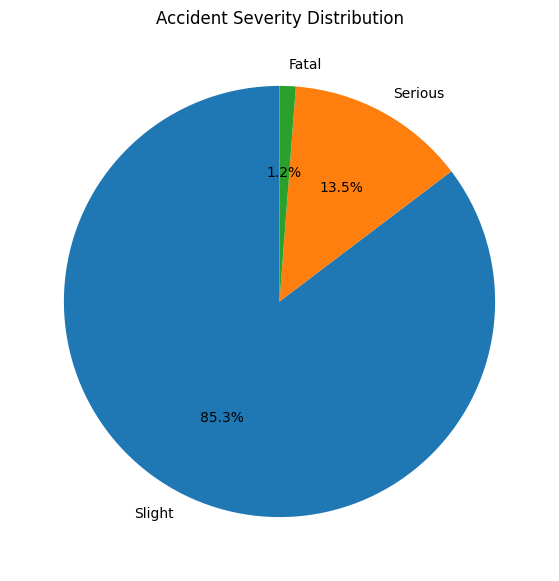

In [43]:
severity_bolton  = Bolton_df['Accident_Severity'].value_counts()

plt.pie(severity_bolton,
        labels = severity_bolton.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_bolton = Bolton_df[Bolton_df['Year'] == 2022]

lsc_2022 = severity_2022_bolton['Accident_Severity'].value_counts()

plt.pie(lsc_2022,
        labels = lsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

In [34]:
Bolton_fatal = Bolton_df[Bolton_df['Accident_Severity'] == 'Fatal']
location = list(zip(Bolton_fatal['Latitude'],Bolton_df['Longitude']))

Map = folium.Map(location=[Bolton_df['Latitude'].mean(), Bolton_df['Longitude'].mean()], zoom_start=10)

HeatMap(location).add_to(Map)

# m.save('accident_heatmap.html')  

Map

<h1>INSIGHTS</h1>
<hr>
<h3>1. The year that has the highest count is 2019 in the Bolton district.</h3>
<h3>2. The month with the highest number of accidents is June.</h3>
<h3>3. Day of the week with the most accidents happend is Saturday.</h3>

<h1>Halton Analysis</h1>
<hr>
<h3>District 3</h3>

In [40]:
Halton_df = Data[Data['District Area'] == 'Halton']

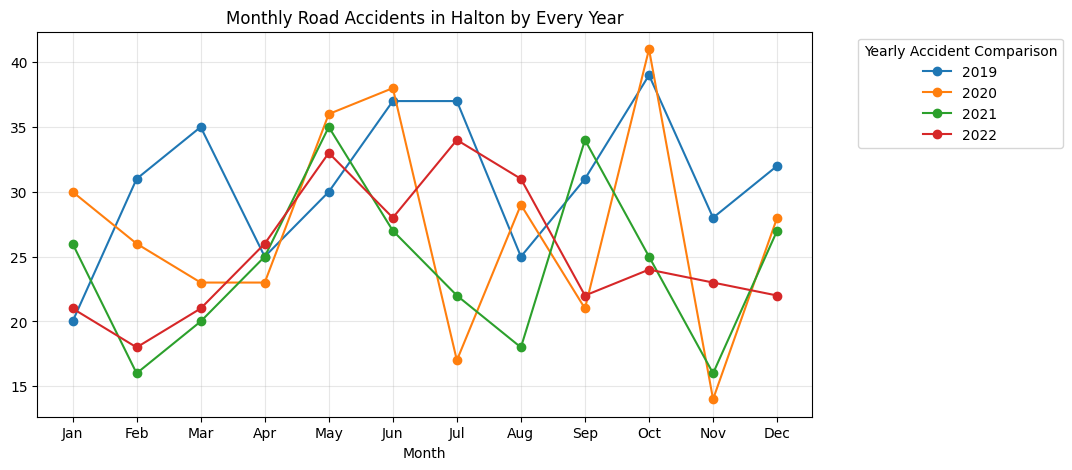

In [41]:
monthly_haltondata = Halton_df.groupby(['Year', 'Month']).size()

monthly_haltondata = monthly_haltondata.unstack(level=0)

monthly_haltondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Halton by Every Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

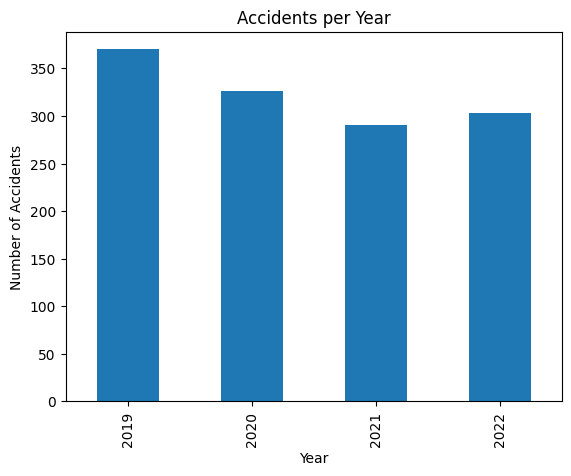

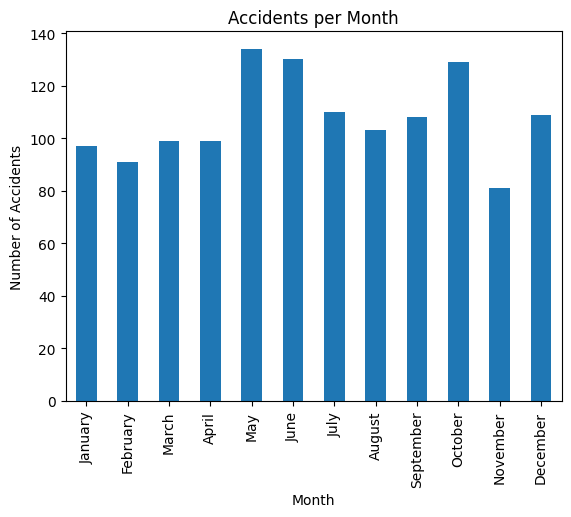

DayOfWeek
Monday       122
Tuesday      201
Wednesday    201
Thursday     203
Friday       197
Saturday     191
Sunday       175
Name: count, dtype: int64


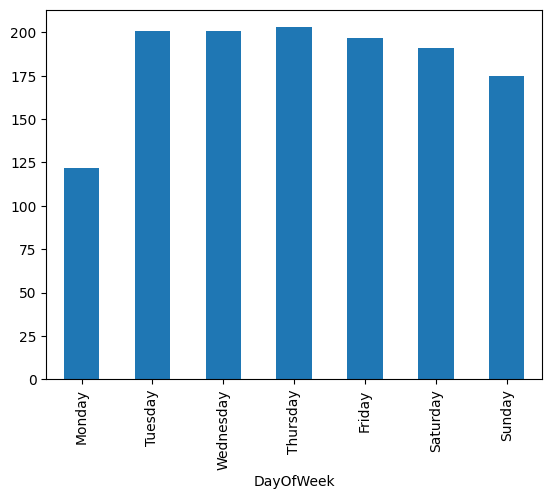

In [42]:
# Accidents per year
accidents_per_year = Halton_df['Year'].value_counts().sort_index()
accidents_per_month = Halton_df['Month'].value_counts().sort_index()
accidents_per_day = Halton_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

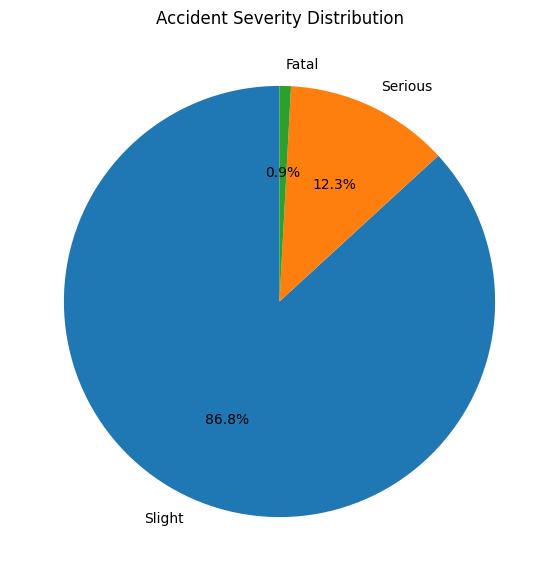

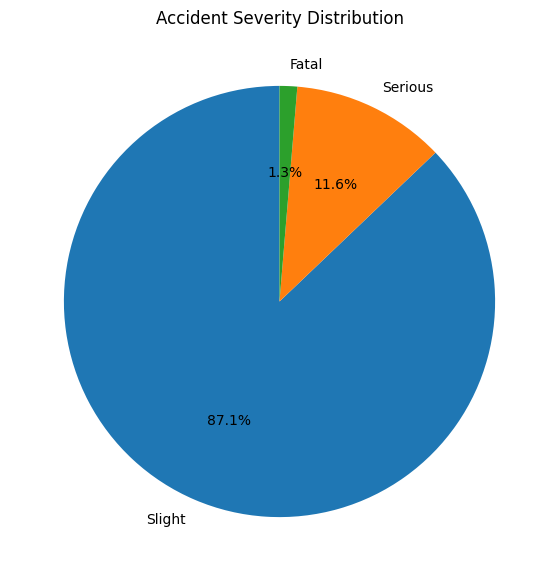

In [44]:
severity_halton  = Halton_df['Accident_Severity'].value_counts()

plt.pie(severity_halton,
        labels = severity_halton.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_halton = Halton_df[Halton_df['Year'] == 2022]

lsc_2022 = severity_2022_halton['Accident_Severity'].value_counts()

plt.pie(lsc_2022,
        labels = lsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

In [54]:
Halton_fatal = Halton_df[Halton_df['Accident_Severity'] == 'Fatal']
location = list(zip(Halton_fatal['Latitude'],Halton_df['Longitude']))

Map = folium.Map(location=[Halton_df['Latitude'].mean(), Halton_df['Longitude'].mean()], zoom_start=10)

HeatMap(location).add_to(Map)

# m.save('accident_heatmap.html')  

Map

<h1>INSIGHTS</h1>
<hr>
<h3>1. The year that has the highest count is 2019 in the Halton district.</h3>
<h3>2. The month with the highest number of accidents is May. </h3>
<h3>3. Day of the week with the most accidents happened in Tuesday, Wednesday, and Thursday.</h3>

<h1>Boston Analysis</h1>
<hr>
<h3>District 4</h3>

In [49]:
Boston_df = Data[Data['District Area'] == 'Boston']

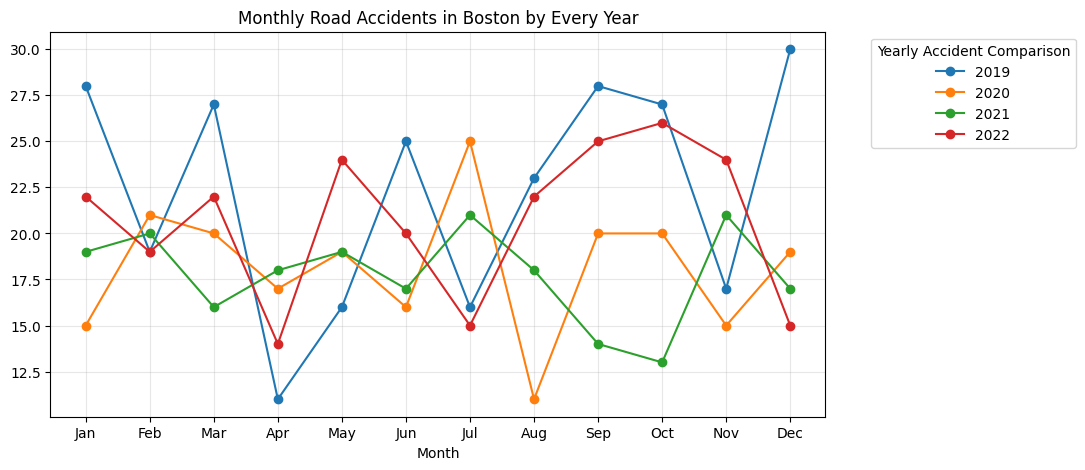

In [50]:
monthly_bostondata = Boston_df.groupby(['Year', 'Month']).size()

monthly_bostondata = monthly_bostondata.unstack(level=0)

monthly_bostondata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Boston by Every Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

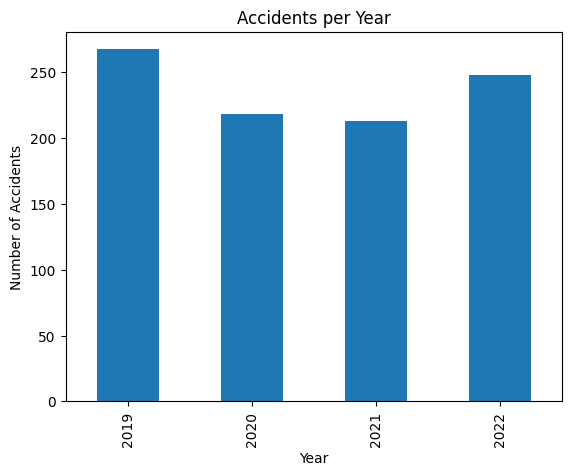

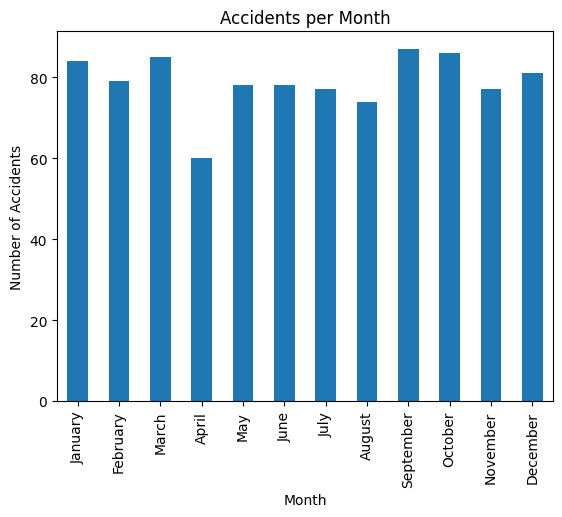

DayOfWeek
Monday       108
Tuesday      130
Wednesday    126
Thursday     131
Friday       134
Saturday     161
Sunday       156
Name: count, dtype: int64


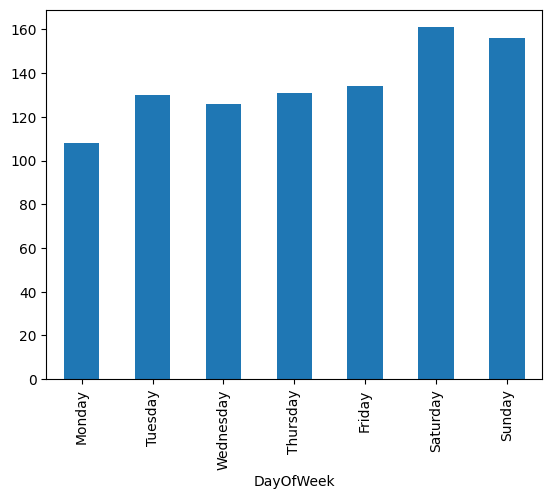

In [51]:
# Accidents per year
accidents_per_year = Boston_df['Year'].value_counts().sort_index()
accidents_per_month = Boston_df['Month'].value_counts().sort_index()
accidents_per_day = Boston_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

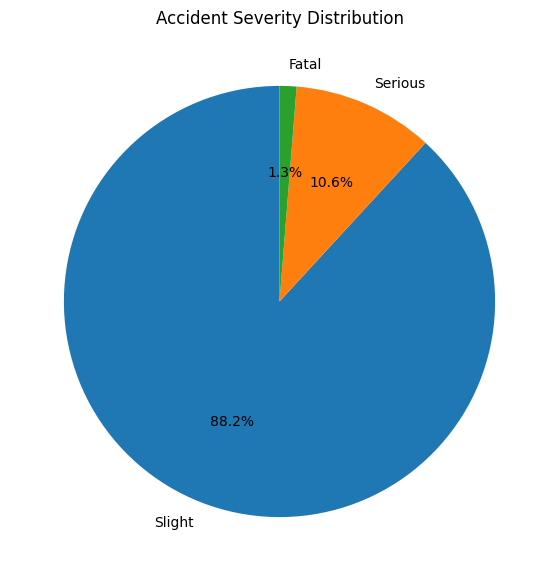

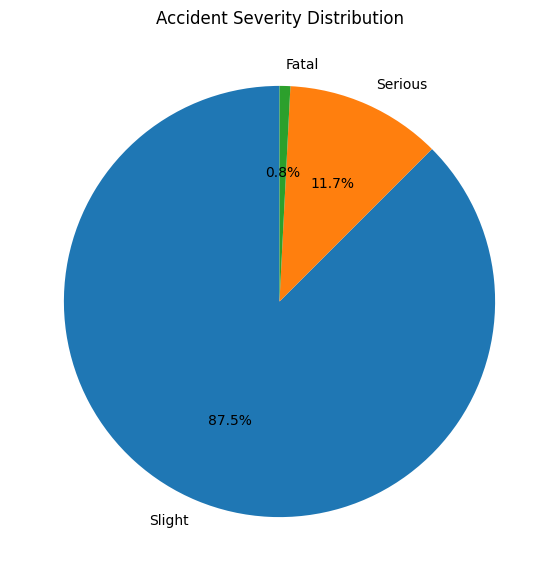

In [53]:
severity_boston = Boston_df['Accident_Severity'].value_counts()

plt.pie(severity_boston,
        labels = severity_boston.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_boston = Boston_df[Boston_df['Year'] == 2022]

lsc_2022 = severity_2022_boston['Accident_Severity'].value_counts()

plt.pie(lsc_2022,
        labels = lsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

In [62]:
Boston_fatal = Boston_df[Boston_df['Accident_Severity'] == 'Fatal']
location = list(zip(Boston_fatal['Latitude'],Boston_df['Longitude']))

Map = folium.Map(location=[Boston_df['Latitude'].mean(), Boston_df['Longitude'].mean()], zoom_start=10)

HeatMap(location).add_to(Map)

# m.save('accident_heatmap.html')  

Map

<h1>INSIGHTS</h1>
<hr>
<h3>1. The year that has the highest count is 2019 in the Boston district.</h3>
<h3>2. The month with the highest number of accidents is September. </h3>
<h3>3. Day of the week with the most accidents happened in Saturday.</h3>

<h1>Oxford Analysis</h1>
<hr>
<h3>District 5</h3>

In [58]:
Oxford_df = Data[Data['District Area'] == 'Oxford']

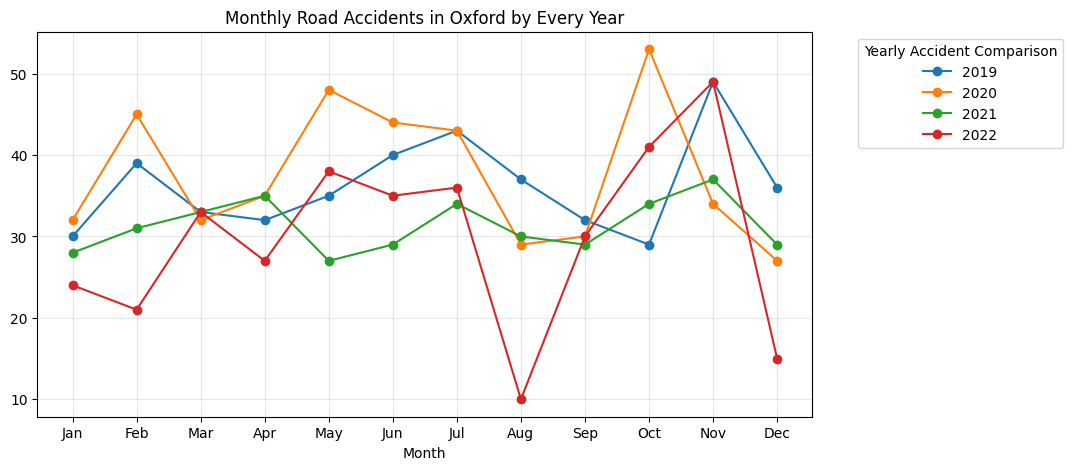

In [69]:
monthly_oxforddata = Oxford_df.groupby(['Year', 'Month']).size()

monthly_oxforddata = monthly_oxforddata.unstack(level=0)

monthly_oxforddata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Oxford by Every Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

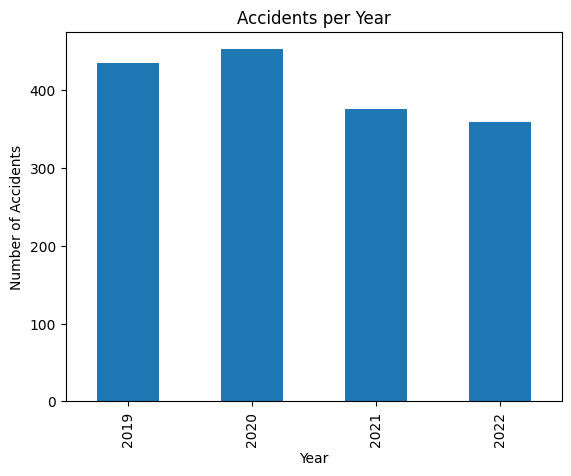

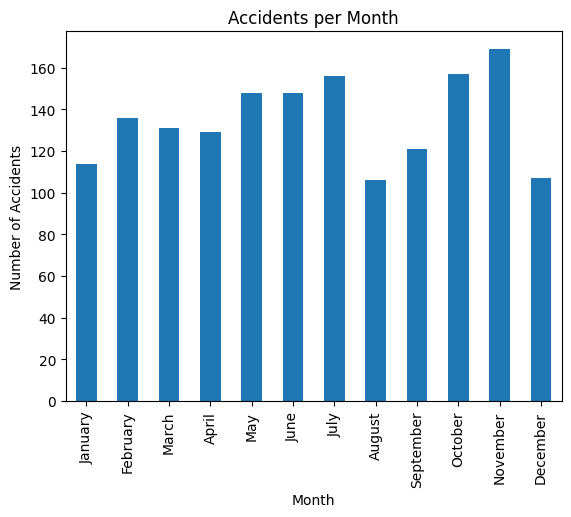

DayOfWeek
Monday       134
Tuesday      223
Wednesday    248
Thursday     267
Friday       292
Saturday     266
Sunday       192
Name: count, dtype: int64


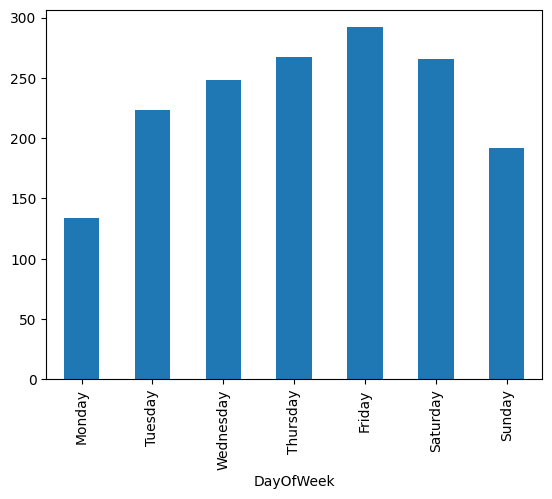

In [60]:
# Accidents per year
accidents_per_year = Oxford_df['Year'].value_counts().sort_index()
accidents_per_month = Oxford_df['Month'].value_counts().sort_index()
accidents_per_day = Oxford_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

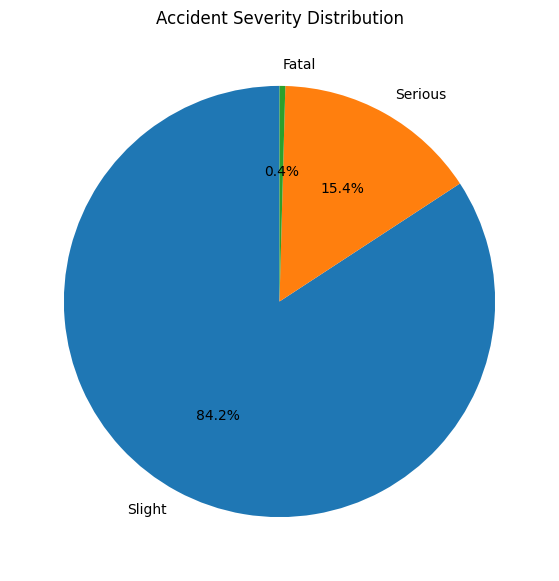

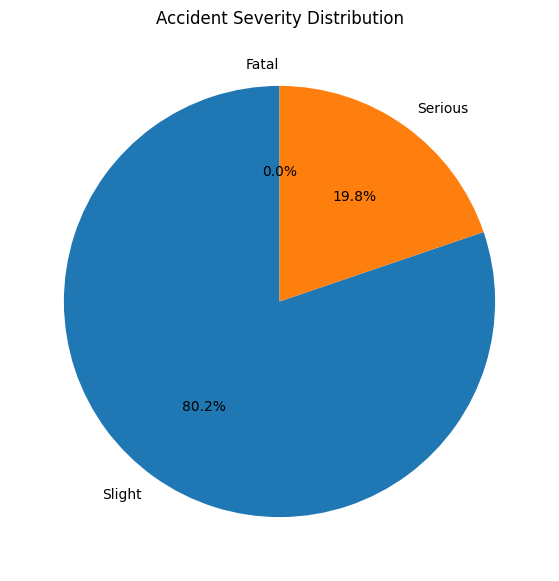

In [61]:
severity_oxford = Oxford_df['Accident_Severity'].value_counts()

plt.pie(severity_oxford,
        labels = severity_oxford.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_oxford = Oxford_df[Oxford_df['Year'] == 2022]

lsc_2022 = severity_2022_oxford['Accident_Severity'].value_counts()

plt.pie(lsc_2022,
        labels = lsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

In [72]:
Oxford_fatal = Oxford_df[Oxford_df['Accident_Severity'] == 'Fatal']
location = list(zip(Oxford_fatal['Latitude'],Oxford_df['Longitude']))

Map = folium.Map(location=[Oxford_df['Latitude'].mean(), Oxford_df['Longitude'].mean()], zoom_start=10)

HeatMap(location).add_to(Map)

# m.save('accident_heatmap.html')  

Map

<h1>INSIGHTS</h1>
<hr>
<h3>1. The year that has the highest count is 2019 in the Oxford district.</h3>
<h3>2. The month with the highest number of accidents is November. </h3>
<h3>3. Day of the week with the most accidents happened in Thursday, Friday, and Saturday.</h3>

<h1>Cornwall Analysis</h1>
<hr>
<h3>District 6</h3>

In [66]:
Cornwall_df = Data[Data['District Area'] == 'Cornwall']

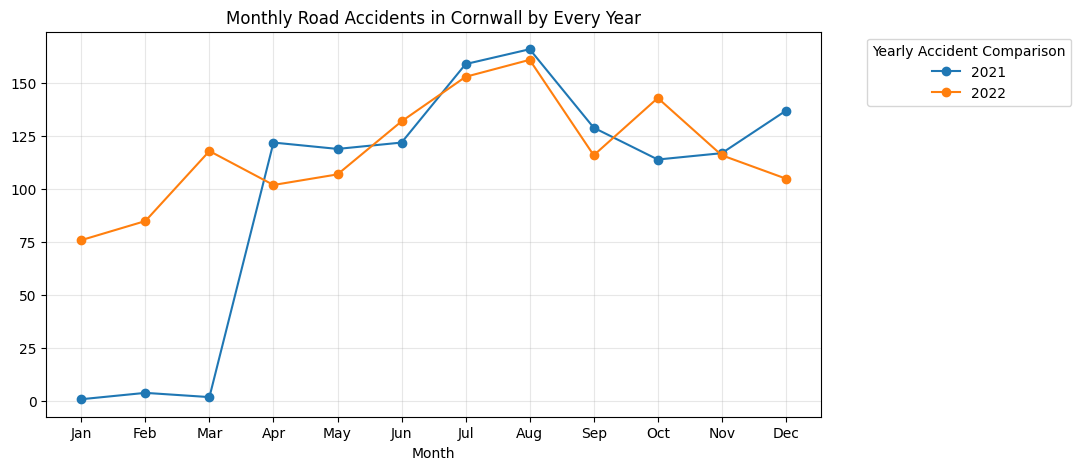

In [68]:
monthly_cornwalldata = Cornwall_df.groupby(['Year', 'Month']).size()

monthly_cornwalldata = monthly_cornwalldata.unstack(level=0)

monthly_cornwalldata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Cornwall by Every Year'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

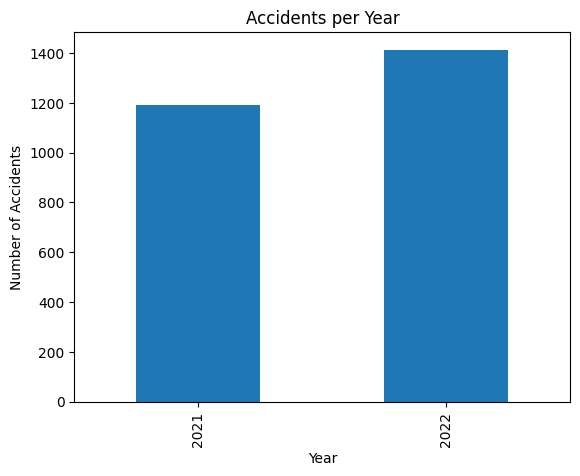

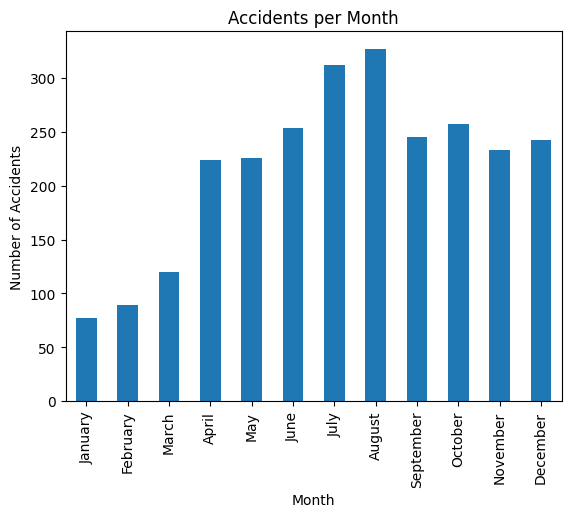

DayOfWeek
Monday       293
Tuesday      356
Wednesday    385
Thursday     413
Friday       376
Saturday     419
Sunday       364
Name: count, dtype: int64


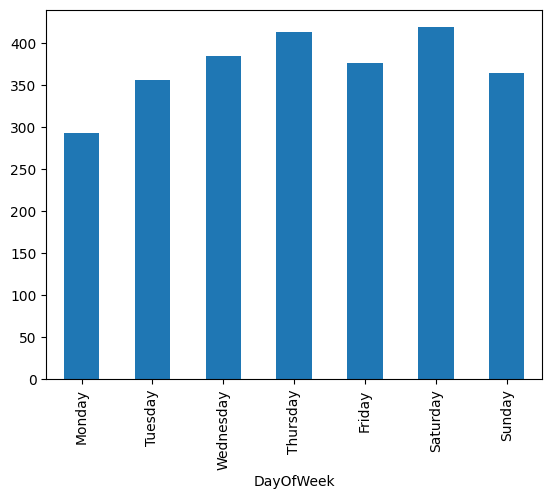

In [71]:
# Accidents per year
accidents_per_year = Cornwall_df['Year'].value_counts().sort_index()
accidents_per_month = Cornwall_df['Month'].value_counts().sort_index()
accidents_per_day = Cornwall_df['DayOfWeek'].value_counts().sort_index()


#PER YEAR 
accidents_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
accidents_per_month.index = accidents_per_month.index.map(month_names)


accidents_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


#accident per day
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')
print(accidents_per_day)

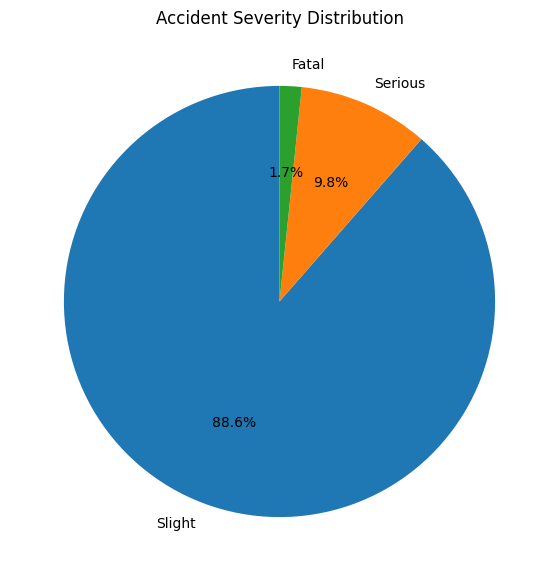

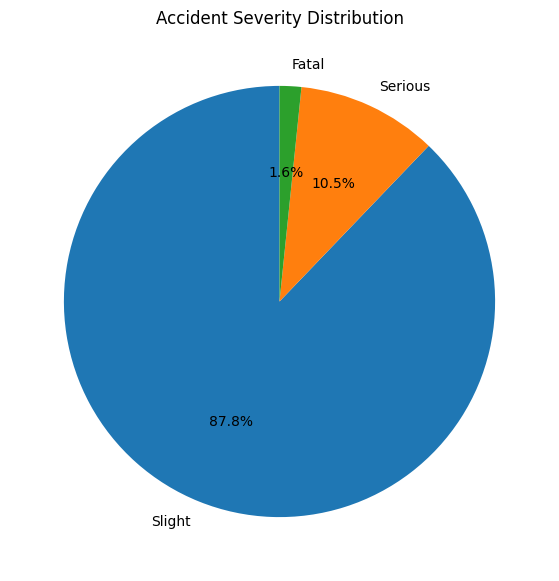

In [73]:
severity_cornwall = Cornwall_df['Accident_Severity'].value_counts()

plt.pie(severity_cornwall,
        labels = severity_cornwall.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2022_cornwall = Cornwall_df[Cornwall_df['Year'] == 2022]

lsc_2022 = severity_2022_cornwall['Accident_Severity'].value_counts()

plt.pie(lsc_2022,
        labels = lsc_2022.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

In [81]:
Cornwall_fatal = Cornwall_df[Cornwall_df['Accident_Severity'] == 'Fatal']
location = list(zip(Cornwall_df['Latitude'],Cornwall_df['Longitude']))

Map = folium.Map(location=[Cornwall_df['Latitude'].mean(), Cornwall_df['Longitude'].mean()], zoom_start=10)

HeatMap(location).add_to(Map)

# m.save('accident_heatmap.html')  

Map

In [79]:
Cornwall_df['Index'].value_counts().sum()

np.int64(2606)

<h1>INSIGHTS</h1>
<hr>
<h3>1. The year that has the highest count is 2022 in the Oxford district.</h3>
<h3>2. The month with the highest number of accidents is August. </h3>
<h3>3. Day of the week with the most accidents happened in Saturday.</h3>

<h1>INSIGHTS</h1>
<h3> Somehow, the entire district area has a visualization for each year, month, week, and day that can easily be understood for our analysis of accidents. Lastly, we put the map visualization for Fatal incidents in every district area.</h3>